In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


In [7]:
# Загрузка данных временного ряда
df = pd.read_csv('./raw_data/Electric_Production.csv', parse_dates=[0], index_col=[0])

In [349]:
data = np.load('./raw_data/train/y_smp_train.npy')

In [189]:
pars = np.load('./raw_data/train/pars_smp_train.npy')

In [111]:
data.shape

(1000000, 200, 3)

In [190]:
pars.shape

(1000000, 15, 1)

In [314]:
res = pd.DataFrame()
for i in range(15):
    temp = pars[i]
    temp = pd.DataFrame(temp)
    res[i] = temp

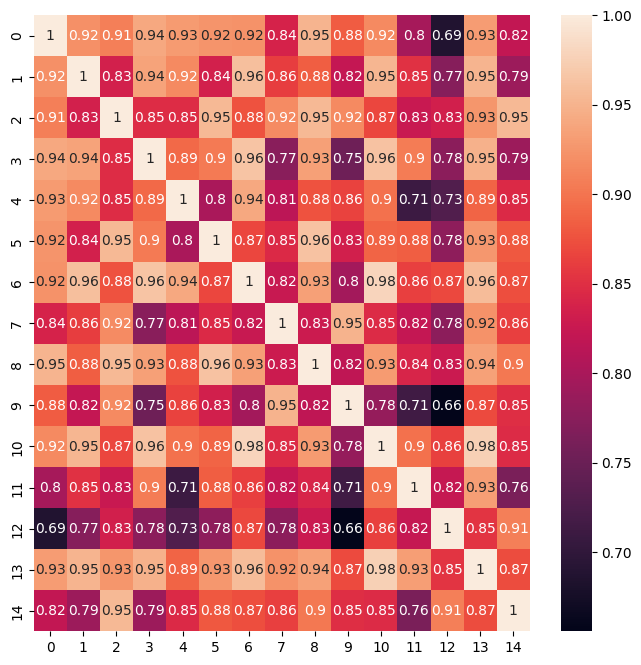

In [315]:
# Pairwise Correlations
plt.figure(figsize=(8, 8))
sns.heatmap(res.corr(), annot = True, fmt='.2g');

In [316]:
res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.753449,1.401436,1.334403,0.607498,0.916058,0.900422,0.963036,2.414644,0.547137,1.914649,1.155388,1.437027,1.536425,1.821648,1.494245
1,1.254865,1.467082,2.336454,1.545866,1.242841,2.093590,2.087941,1.748975,1.831102,1.220933,2.114938,2.115994,3.937082,2.384808,3.218959
2,0.483080,0.410044,0.461787,0.587864,0.737584,0.317891,0.571818,0.278854,0.452027,0.422358,0.324480,0.345308,0.321688,0.515346,0.373626
3,0.515530,0.505824,0.449470,0.490068,0.527845,0.397205,0.563134,0.553847,0.406387,0.511939,0.516546,0.476338,0.430309,0.463914,0.563731
4,1.692718,1.435110,1.510736,1.586696,1.537009,1.665150,1.606838,1.288088,1.164159,1.726068,1.480701,1.557731,1.055029,1.842691,1.795638
5,0.071544,0.049643,0.010414,0.165016,0.163276,0.101121,0.139473,0.135222,0.120340,0.080121,0.198782,0.116782,0.156920,0.049034,0.105303
6,1.068755,1.030599,1.278810,1.338748,0.259505,1.960677,0.852420,1.159894,1.129125,0.713066,1.183667,2.311279,0.995285,1.717164,0.743112
7,3.119469,2.839339,3.179590,2.269942,2.165877,3.015150,2.626391,2.819130,2.626657,2.906799,2.687015,2.004494,2.297059,3.341674,3.020507
8,0.371823,0.314056,0.445334,0.399408,0.430021,0.332112,0.293888,0.522157,0.505440,0.309378,0.315049,0.350981,0.204225,0.326042,0.424011
9,0.234443,0.844651,0.361136,0.378931,0.456702,0.347810,0.548262,0.301485,0.359238,0.242408,0.177974,0.406850,0.581499,0.228013,0.699952


In [317]:
cols = []
for i in range(15):
    text = f'x{i}'
    cols.append(text)

In [318]:
res.columns = cols

In [320]:
X = res['x0']
y = res['x14']

In [321]:
X

0     0.753449
1     1.254865
2     0.483080
3     0.515530
4     1.692718
5     0.071544
6     1.068755
7     3.119469
8     0.371823
9     0.234443
10    0.671631
11   -0.086194
12    0.057107
13    0.104900
14    0.055005
Name: x0, dtype: float64

In [322]:
y

0     1.494245
1     3.218959
2     0.373626
3     0.563731
4     1.795638
5     0.105303
6     0.743112
7     3.020507
8     0.424011
9     0.699952
10    0.708836
11    0.882777
12    0.088019
13    0.043843
14    0.085158
Name: x14, dtype: float64

In [202]:
from sklearn.ensemble import RandomForestRegressor

In [217]:
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [218]:
y_pred_train = rf_regressor.predict(X)

In [123]:
df_pars = pars[1]
df_pars = pd.DataFrame(df_pars)

In [222]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [220]:
mean_absolute_error(y, y_pred_train)

0.1321311330857037

In [223]:
mean_squared_error(y, y_pred_train)

0.054602150920389746

In [323]:
test = pd.DataFrame()
for i in range(15, 30):
    temp = pars[i]
    temp = pd.DataFrame(temp)
    test[i] = temp

In [324]:
test

,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.327873,1.754320,1.443980,1.321601,1.180797,1.558156,1.973182,1.683662,1.328692,1.418103,2.049706,2.086182,1.085964,1.294866,1.470795
1,1.481011,1.771968,3.154915,3.608371,1.718174,2.310362,1.896763,1.758983,1.248647,0.854269,1.216498,2.436388,2.776263,1.288294,2.364673
2,0.574172,0.440181,0.491823,0.628068,0.557270,0.512841,0.447458,0.544150,0.719644,0.479298,0.585680,0.657272,0.649828,0.415614,0.451598
3,0.375368,0.350157,0.605202,0.579475,0.451231,0.408027,0.496450,0.462459,0.419792,0.476610,0.615227,0.490204,0.277541,0.634068,0.577380
4,1.541261,1.673561,1.765790,1.439955,1.528448,1.375780,1.069168,1.298855,1.653356,1.651347,1.460011,1.742722,1.484325,1.436408,1.596070
5,0.178182,0.188344,0.162785,0.134301,0.075697,0.155811,0.096960,0.057116,0.043551,0.052456,0.164142,0.077862,0.164585,0.045313,0.048838
6,1.439139,1.291467,0.666497,1.458932,1.400861,0.553223,0.767677,1.326062,1.488528,0.556425,0.716675,0.432327,0.744367,1.898362,0.711149
7,1.881443,2.258622,2.130014,2.174788,2.076922,2.091918,2.399151,2.116534,2.332686,2.421718,2.901534,1.945184,2.091561,2.051667,2.975007
8,0.352956,0.346543,0.366567,0.348151,0.478797,0.389019,0.519435,0.499379,0.531598,0.486532,0.295805,0.307308,0.309539,0.330605,0.423003
9,0.452052,0.107151,0.083958,0.489185,0.568096,0.626372,0.573944,0.517190,0.618230,0.901652,0.748681,0.818030,0.707181,0.478123,0.459764


In [325]:
test.columns = cols

In [326]:
test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,1.327873,1.754320,1.443980,1.321601,1.180797,1.558156,1.973182,1.683662,1.328692,1.418103,2.049706,2.086182,1.085964,1.294866,1.470795
1,1.481011,1.771968,3.154915,3.608371,1.718174,2.310362,1.896763,1.758983,1.248647,0.854269,1.216498,2.436388,2.776263,1.288294,2.364673
2,0.574172,0.440181,0.491823,0.628068,0.557270,0.512841,0.447458,0.544150,0.719644,0.479298,0.585680,0.657272,0.649828,0.415614,0.451598
3,0.375368,0.350157,0.605202,0.579475,0.451231,0.408027,0.496450,0.462459,0.419792,0.476610,0.615227,0.490204,0.277541,0.634068,0.577380
4,1.541261,1.673561,1.765790,1.439955,1.528448,1.375780,1.069168,1.298855,1.653356,1.651347,1.460011,1.742722,1.484325,1.436408,1.596070
5,0.178182,0.188344,0.162785,0.134301,0.075697,0.155811,0.096960,0.057116,0.043551,0.052456,0.164142,0.077862,0.164585,0.045313,0.048838
6,1.439139,1.291467,0.666497,1.458932,1.400861,0.553223,0.767677,1.326062,1.488528,0.556425,0.716675,0.432327,0.744367,1.898362,0.711149
7,1.881443,2.258622,2.130014,2.174788,2.076922,2.091918,2.399151,2.116534,2.332686,2.421718,2.901534,1.945184,2.091561,2.051667,2.975007
8,0.352956,0.346543,0.366567,0.348151,0.478797,0.389019,0.519435,0.499379,0.531598,0.486532,0.295805,0.307308,0.309539,0.330605,0.423003
9,0.452052,0.107151,0.083958,0.489185,0.568096,0.626372,0.573944,0.517190,0.618230,0.901652,0.748681,0.818030,0.707181,0.478123,0.459764


In [327]:
test_X = test['x0']
test_y = test['x14']

In [328]:
test_X

0     1.327873
1     1.481011
2     0.574172
3     0.375368
4     1.541261
5     0.178182
6     1.439139
7     1.881443
8     0.352956
9     0.452052
10    0.314870
11   -0.285847
12    0.055649
13    0.063409
14    0.062073
Name: x0, dtype: float64

In [329]:
test_y

0     1.470795
1     2.364673
2     0.451598
3     0.577380
4     1.596070
5     0.048838
6     0.711149
7     2.975007
8     0.423003
9     0.459764
10    0.292994
11   -0.836701
12    0.194791
13    0.114967
14    0.116884
Name: x14, dtype: float64

In [237]:
y_pred_test = rf_regressor.predict(test_X)

In [239]:
mean_absolute_error(test_y, y_pred_test)

0.28422868500568976

In [238]:
mean_squared_error(test_y, y_pred_test)

0.16999316519847354

In [240]:
y_pred_test.mean()

0.8363626680501983

In [241]:
test_y.mean()

0.7307473306947496

In [255]:
from sklearn.linear_model import LinearRegression

In [264]:
from sklearn.preprocessing import StandardScaler

In [265]:
scaler = StandardScaler()

array([[[ 1.14232967,  0.8743082 ,  1.44608981],
        [-0.48404038,  0.61936718,  1.1793994 ],
        [ 0.66575019,  0.67293175,  1.14851425],
        ...,
        [-0.75664941,  0.62169112,  1.24812897],
        [ 1.66556441,  0.92514013,  1.53965631],
        [ 2.24337735,  1.16610985,  2.09913783]],

       [[ 4.85903742,  3.23126495,  2.90209578],
        [-7.29039441, -5.05621154,  1.33229062],
        [ 3.07779613, -2.77816895,  0.64732039],
        ...,
        [-2.97624653, -4.75995558, -2.38069386],
        [ 2.93048549,  0.83819116, -1.7839154 ],
        [-0.620153  ,  2.48687114, -0.96242668]],

       [[ 0.97876809,  0.67655572,  1.73955113],
        [ 0.28849528,  1.27203121,  2.02185647],
        [ 0.91805251,  0.99326457,  1.85336361],
        ...,
        [-0.47733673,  1.3408008 ,  1.86770453],
        [ 2.14300845,  0.21454462,  1.14332202],
        [ 0.12191956,  1.22080014,  1.69981002]],

       ...,

       [[-1.37911689, -0.07341832,  0.19586597],
        [ 2

In [350]:
data[6]

array([[-1.34456803e-01,  6.72730623e-01,  9.80781110e-01],
       [ 3.02558957e-01,  9.39683185e-01,  1.31242752e+00],
       [-2.81361722e-01,  5.75114782e-01,  1.34322676e+00],
       [ 7.94374321e-02,  5.68000817e-01,  1.11193203e+00],
       [-1.71904644e-01,  5.14362061e-01,  1.01807023e+00],
       [ 4.05347751e-01,  9.14279900e-01,  1.19390244e+00],
       [ 6.34376296e-01,  1.09177312e+00,  1.55633061e+00],
       [ 7.24793604e-01,  9.73757699e-01,  1.43550748e+00],
       [ 9.85278622e-01,  7.94688339e-01,  1.41357732e+00],
       [ 9.26898171e-01,  6.99163448e-01,  1.46549501e+00],
       [-2.67342519e-02,  4.33465544e-01,  1.12554926e+00],
       [ 3.36216138e-01,  5.90000065e-01,  1.12381511e+00],
       [-1.23574261e+00,  8.36709769e-02,  6.14461853e-01],
       [-4.36109311e-01,  2.10771917e-01,  4.41247085e-01],
       [-8.22469250e-01,  1.81334231e-01,  3.38182529e-01],
       [-2.87143887e+00, -6.59369773e-01, -3.02964971e-01],
       [ 4.53585956e-01,  1.23468715e-01

In [303]:
X = X['x0']

In [306]:
X

0     0.753449
1     1.254865
2     0.483080
3     0.515530
4     1.692718
5     0.071544
6     1.068755
7     3.119469
8     0.371823
9     0.234443
10    0.671631
11   -0.086194
12    0.057107
13    0.104900
14    0.055005
Name: x0, dtype: float64

In [310]:
test_X = test_X['x0']

KeyError: 'x0'

In [309]:
X_scaler = scaler.fit_transform(X)
test_scaler = scaler.transform(test_X)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.75344854  1.25486516  0.48308029  0.51552987  1.69271804  0.07154417
  1.06875518  3.11946885  0.37182308  0.23444264  0.67163063 -0.08619357
  0.05710694  0.10489978  0.05500543].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [300]:
X_scaler[0]

array([ 0.0766599 ,  0.84315198,  0.54057634, -0.04893586,  0.48892384,
        0.04843469,  0.32548511,  1.86889448, -0.1929504 ,  1.43304807,
        0.51743359,  0.80236103,  0.7005012 ,  0.9043411 ])

In [311]:
reg = LinearRegression().fit(X, y)


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.75344854  1.25486516  0.48308029  0.51552987  1.69271804  0.07154417
  1.06875518  3.11946885  0.37182308  0.23444264  0.67163063 -0.08619357
  0.05710694  0.10489978  0.05500543].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [295]:
reg_pred = reg.predict(test_scaler)

In [296]:
mean_absolute_error(test_y, reg_pred)

3.5432486037151745

In [297]:
mean_squared_error(test_y, reg_pred)

27.062564423413157

In [298]:
reg_pred.mean()

2.549523579557935

In [299]:
test_y.mean()

0.7307473306947496

In [358]:
data[0]

array([[ 1.14232967,  0.8743082 ,  1.44608981],
       [-0.48404038,  0.61936718,  1.1793994 ],
       [ 0.66575019,  0.67293175,  1.14851425],
       [ 0.58320887,  0.70243386,  1.18595872],
       [ 2.08442578,  0.78546524,  1.53035258],
       [ 0.40156107,  0.79063341,  1.5246075 ],
       [ 0.16832701,  0.80362424,  1.43133423],
       [-0.45414267,  0.9105709 ,  1.4667741 ],
       [ 0.47847043,  0.82287238,  1.59309717],
       [ 0.43812222,  0.71024841,  1.42655248],
       [-0.1697961 ,  0.53885673,  1.15439917],
       [ 0.44012284,  0.63238205,  1.19122225],
       [-0.35095048,  0.6401296 ,  1.12756885],
       [ 0.53796555,  0.61194021,  1.29163476],
       [ 0.35984426,  0.57352652,  1.23705799],
       [ 1.21439562,  0.82606791,  1.53890334],
       [-0.27180404,  0.8647934 ,  1.48013047],
       [-0.41884704,  0.83945156,  1.38527051],
       [ 0.83883772,  0.97438594,  1.61587892],
       [ 1.48549353,  0.95774599,  1.7857263 ],
       [ 0.4482016 ,  0.88840251,  1.680

In [360]:
data[1]

array([[ 4.85903742e+00,  3.23126495e+00,  2.90209578e+00],
       [-7.29039441e+00, -5.05621154e+00,  1.33229062e+00],
       [ 3.07779613e+00, -2.77816895e+00,  6.47320387e-01],
       [ 2.58530270e+00,  1.03245509e+00,  8.59659375e-01],
       [-3.25319918e+00, -2.05405612e+00,  3.11890348e-01],
       [ 3.15543139e+00,  1.46636372e+00,  6.63035874e-01],
       [-1.11951868e+00,  8.47127120e-01,  7.04806745e-01],
       [ 5.99297392e+00,  6.73171783e+00,  2.20743558e+00],
       [-3.20383512e+00,  2.46581668e+00,  2.40820784e+00],
       [-4.46538318e+00, -4.33606082e+00,  1.01326881e+00],
       [-4.40603165e+00, -9.60570630e+00, -1.28222003e+00],
       [ 7.70139472e-01, -6.91652670e+00, -2.59207985e+00],
       [-3.70101449e+00, -6.76090624e+00, -3.66168325e+00],
       [-3.81166306e+00, -6.49122356e+00, -4.54795981e+00],
       [-5.94445974e+00, -8.18229067e+00, -5.71382475e+00],
       [ 1.44922390e-01, -2.58539006e+00, -5.32779300e+00],
       [-2.44835895e+00,  4.39352217e-01

In [357]:
df

,0,1,2
0,4.859037,3.231265,2.902096
1,-7.290394,-5.056212,1.332291
2,3.077796,-2.778169,0.647320
3,2.585303,1.032455,0.859659
4,-3.253199,-2.054056,0.311890
...,...,...,...
195,2.277263,-0.592880,-1.055297
196,-5.055258,-3.026917,-1.526620
197,-2.976247,-4.759956,-2.380694
198,2.930485,0.838191,-1.783915


In [331]:
import numpy as np
from sklearn.decomposition import PCA

In [351]:
df = pd.DataFrame(data[1])

In [352]:
pca = PCA(n_components=3)

In [353]:
df_pca = pca.fit_transform(df)

In [354]:
df_pca = pd.DataFrame(df_pca)

<Axes: >

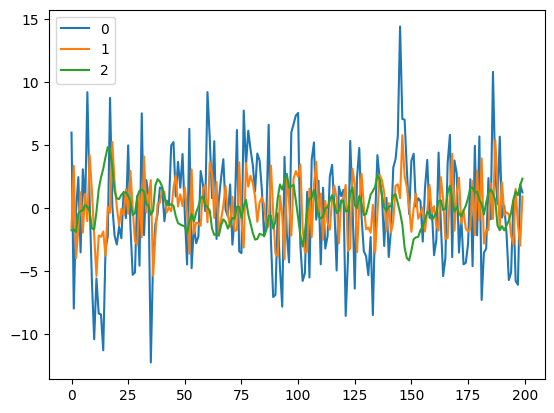

In [355]:
df_pca.plot()

<Axes: >

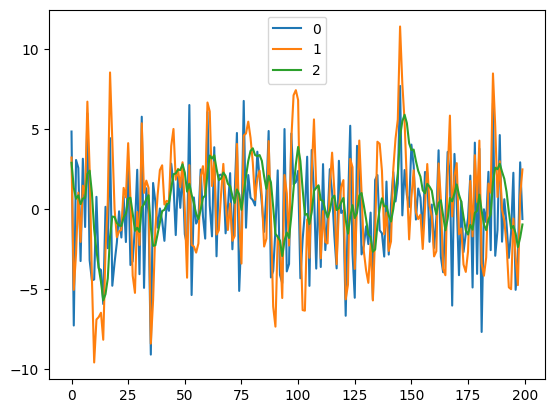

In [356]:
df.plot()

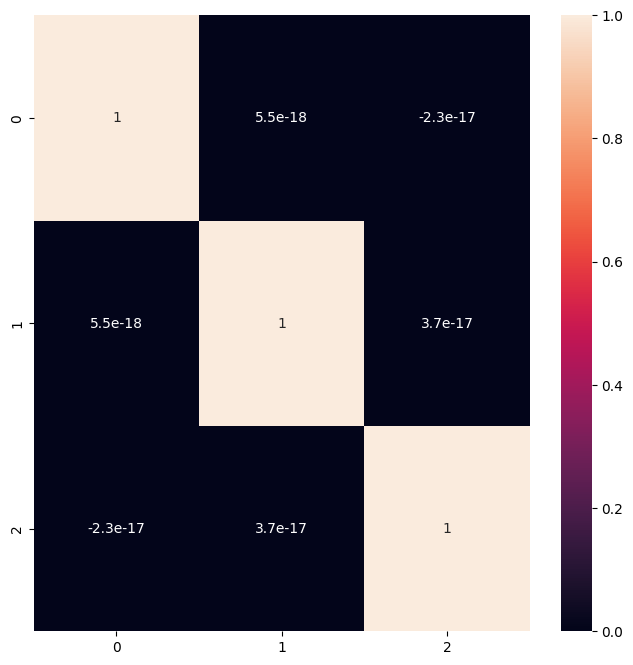

In [361]:
# Pairwise Correlations
plt.figure(figsize=(8, 8))
sns.heatmap(df_pca.corr(), annot = True, fmt='.2g');

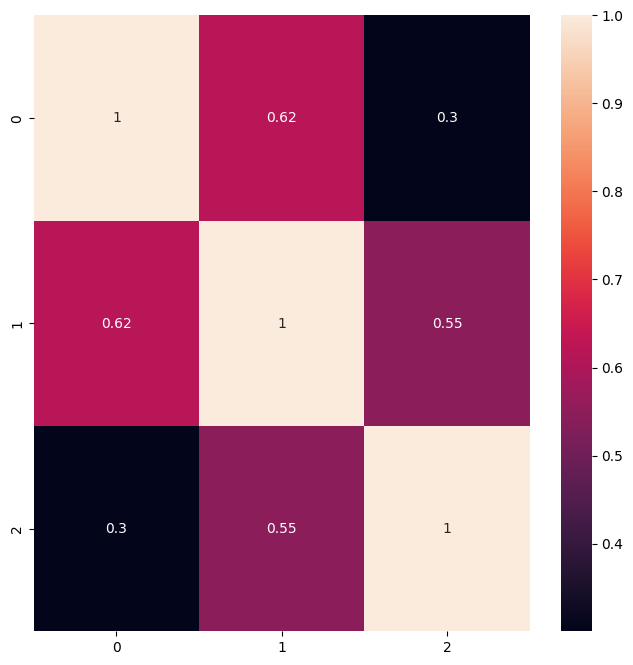

In [362]:
# Pairwise Correlations
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot = True, fmt='.2g');

In [ ]:
aaaaaa

In [124]:
df_pars

,0
0,1.401436
1,1.467082
2,0.410044
3,0.505824
4,1.435110
5,0.049643
6,1.030599
7,2.839339
8,0.314056
9,0.844651


In [142]:
a = data[0]
b = data[1]
c = data[2]
d = data[3]

a = pd.DataFrame(a)
b = pd.DataFrame(b)
c = pd.DataFrame(c)
d = pd.DataFrame(d)

In [147]:
a.plot(ax=axes[0][0])
b.plot(ax=axes[0][1])
c.plot(ax=axes[1][0])
d.plot(ax=axes[1][1])

NameError: name 'axes' is not defined

In [144]:
e

,0,1,2


<Axes: >

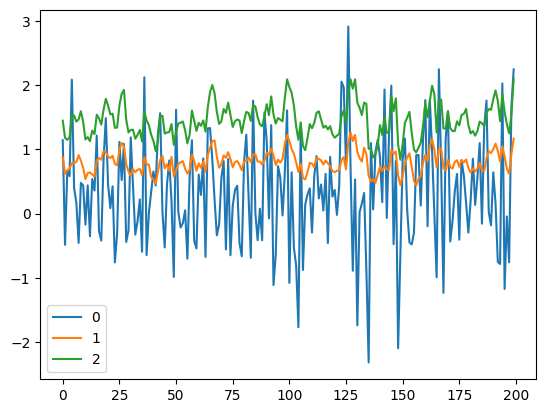

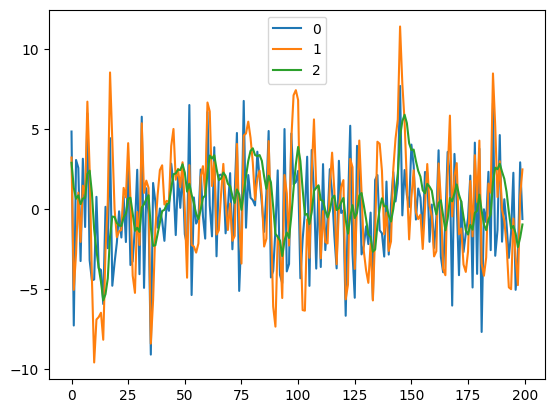

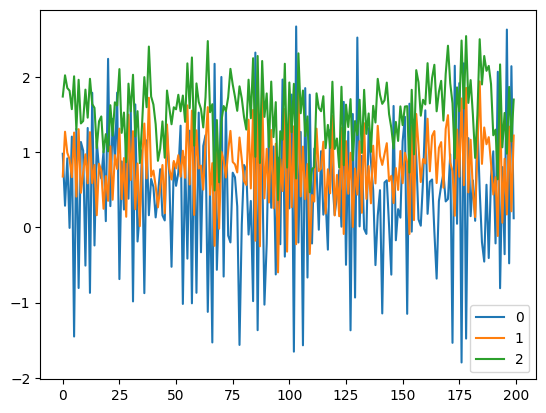

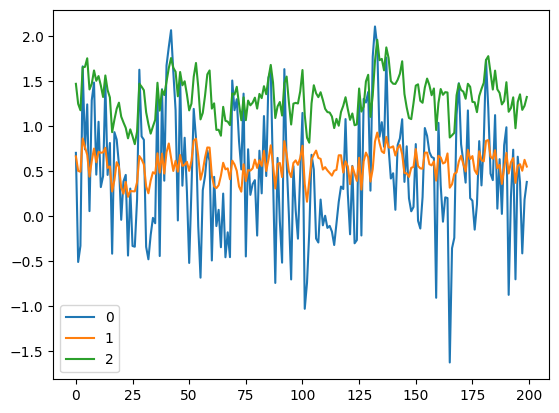

In [138]:
a.plot()
b.plot()
c.plot()
d.plot()

In [112]:
df = data[0]

# Преобразование 2D массива в объект DataFrame
df = pd.DataFrame(df)

In [113]:
df

,0,1,2
0,1.142330,0.874308,1.446090
1,-0.484040,0.619367,1.179399
2,0.665750,0.672932,1.148514
3,0.583209,0.702434,1.185959
4,2.084426,0.785465,1.530353
...,...,...,...
195,-1.170654,0.886007,1.576825
196,-0.042919,0.699045,1.392718
197,-0.756649,0.621691,1.248129
198,1.665564,0.925140,1.539656


In [88]:
df.shape

(200, 3)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [90]:
# Вывести первые несколько строк данных
df.head()

,0,1,2
0,6.180205,-1.602467,0.536331
1,-3.311593,1.342351,1.277820
2,1.139713,0.449749,1.221964
3,-0.043954,1.581237,1.659969
4,-1.565545,0.745888,1.594859


In [91]:
# сортируем индексы и проверяем их порядок
df = df.sort_index()
df.index.is_monotonic_increasing

True

In [92]:
# Описательная статистика временного ряда
df.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,0.283312,0.431359,0.996098
std,2.229309,0.903522,0.443132
min,-6.368010,-2.808491,-0.186635
25%,-1.293610,-0.183636,0.697560
50%,0.359716,0.450840,0.990872
75%,1.737777,1.060447,1.305705
max,6.180205,2.502127,2.004628


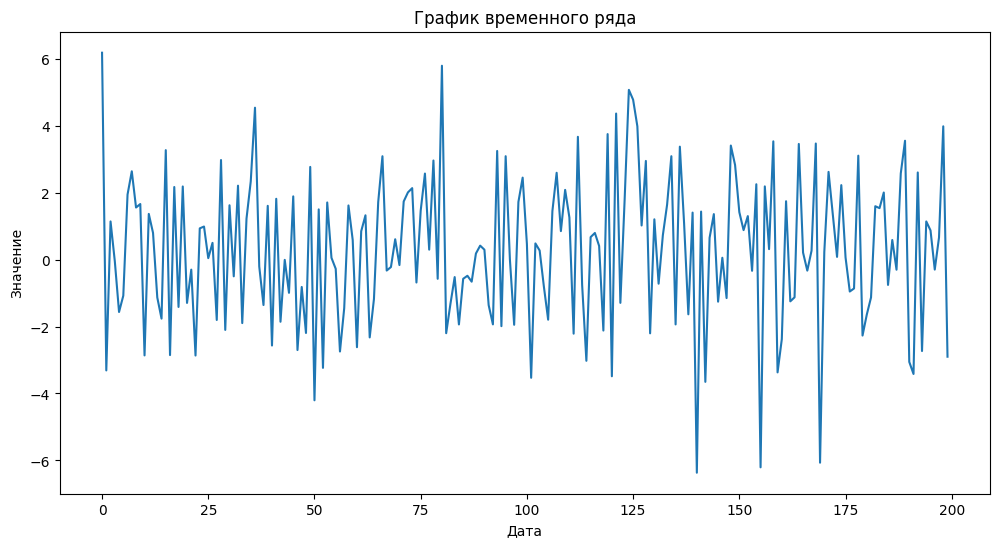

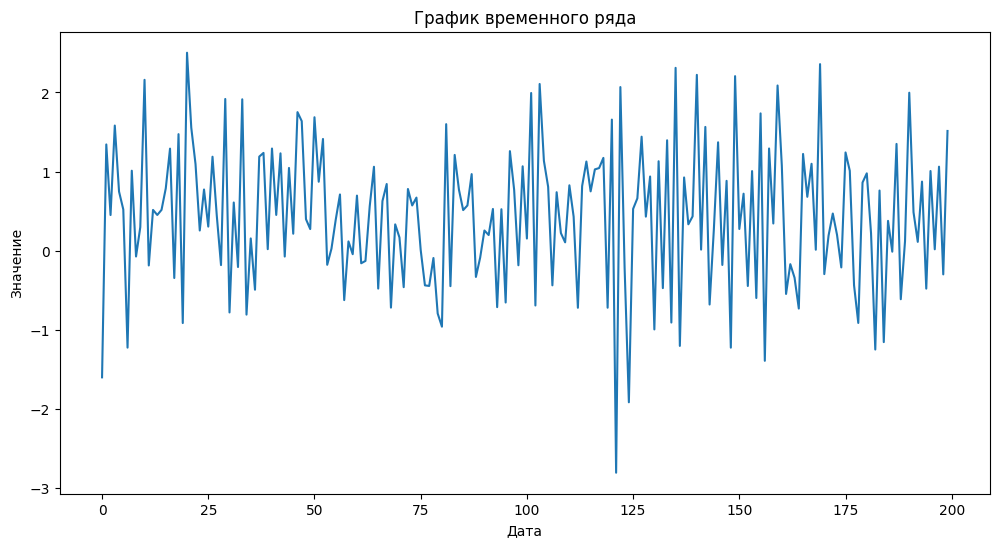

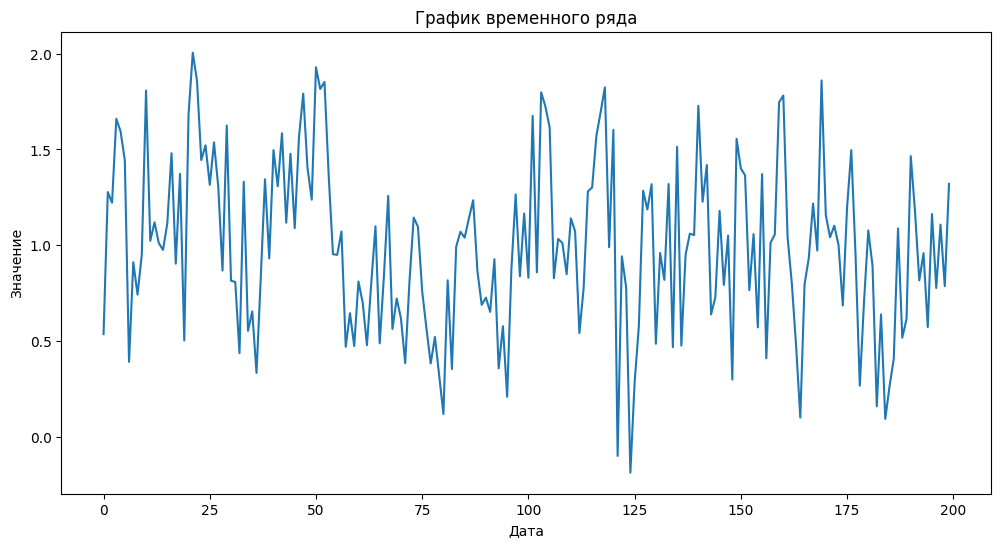

In [94]:
# График временного ряда
for i in df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[i])
    plt.title('График временного ряда')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.show()

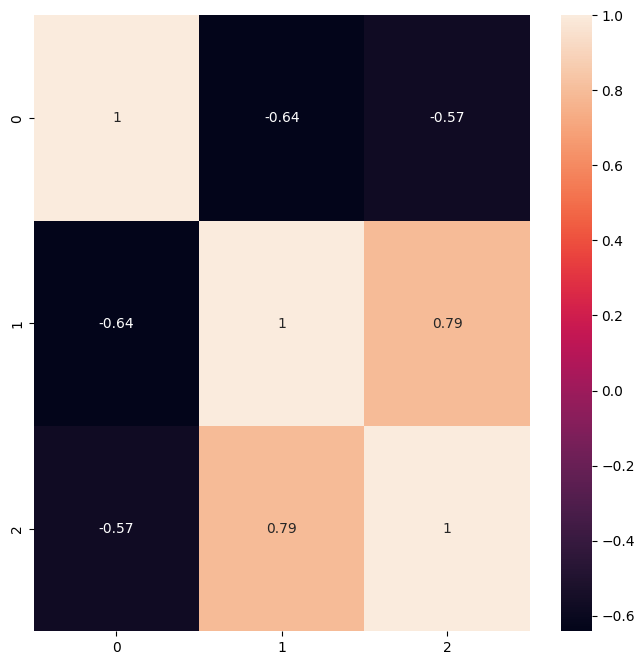

In [95]:
# Pairwise Correlations
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot = True, fmt='.2g');

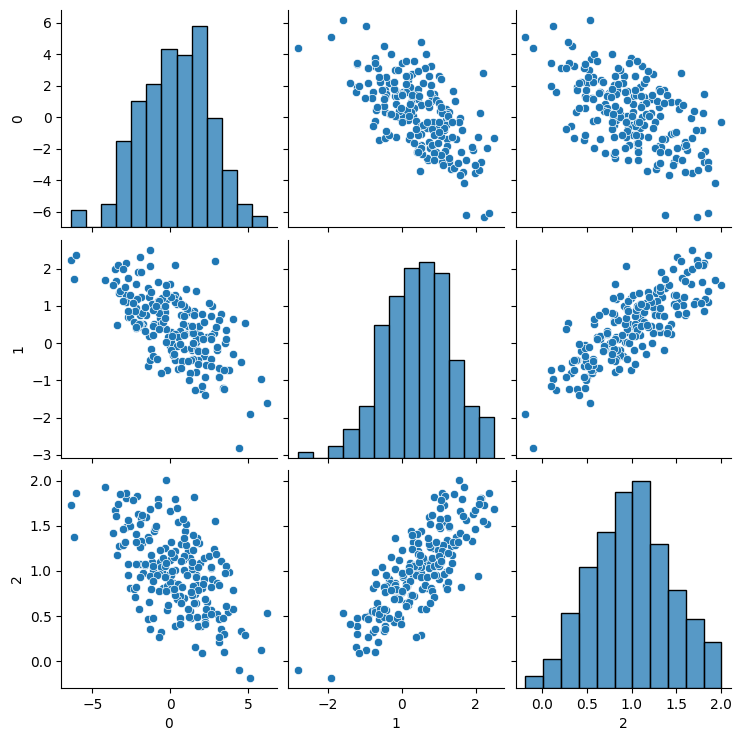

In [96]:
# Pairplot
features = df.columns
sns.pairplot(df.reset_index()[features]);

C:\Users\wilte\AppData\Local\Temp\ipykernel_7024\2865159929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].values,bins=bins,label='all data') #without gaps


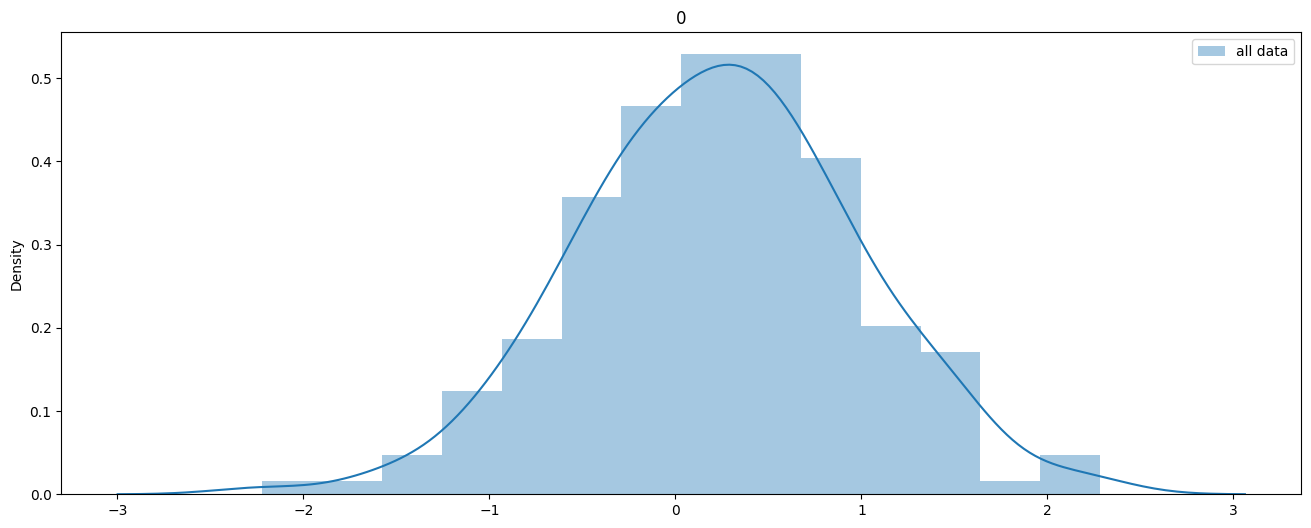

C:\Users\wilte\AppData\Local\Temp\ipykernel_7024\2865159929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].values,bins=bins,label='all data') #without gaps


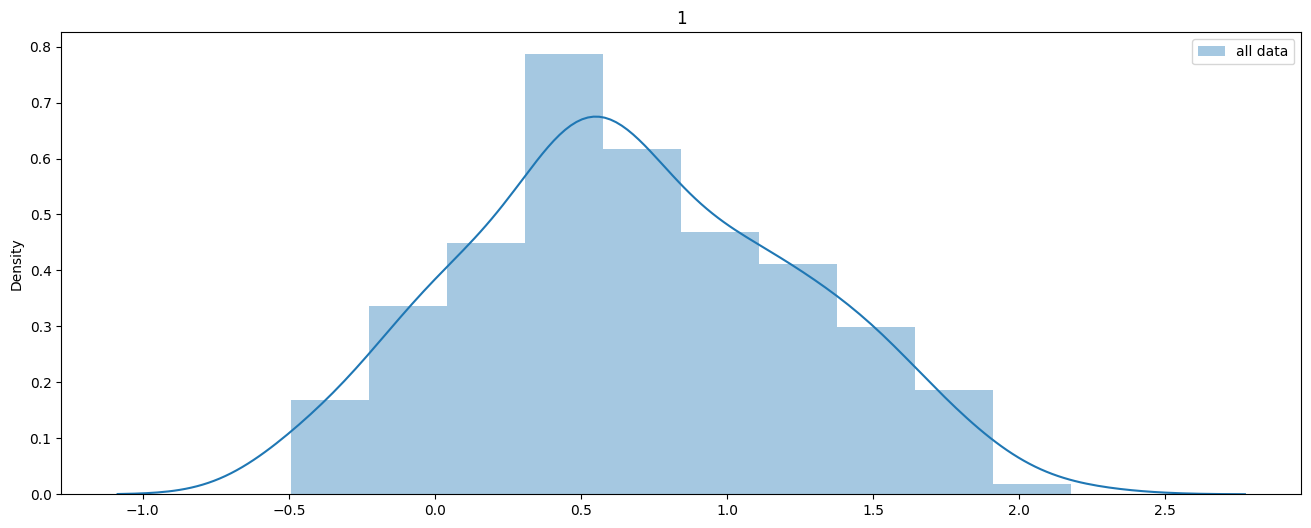

C:\Users\wilte\AppData\Local\Temp\ipykernel_7024\2865159929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].values,bins=bins,label='all data') #without gaps


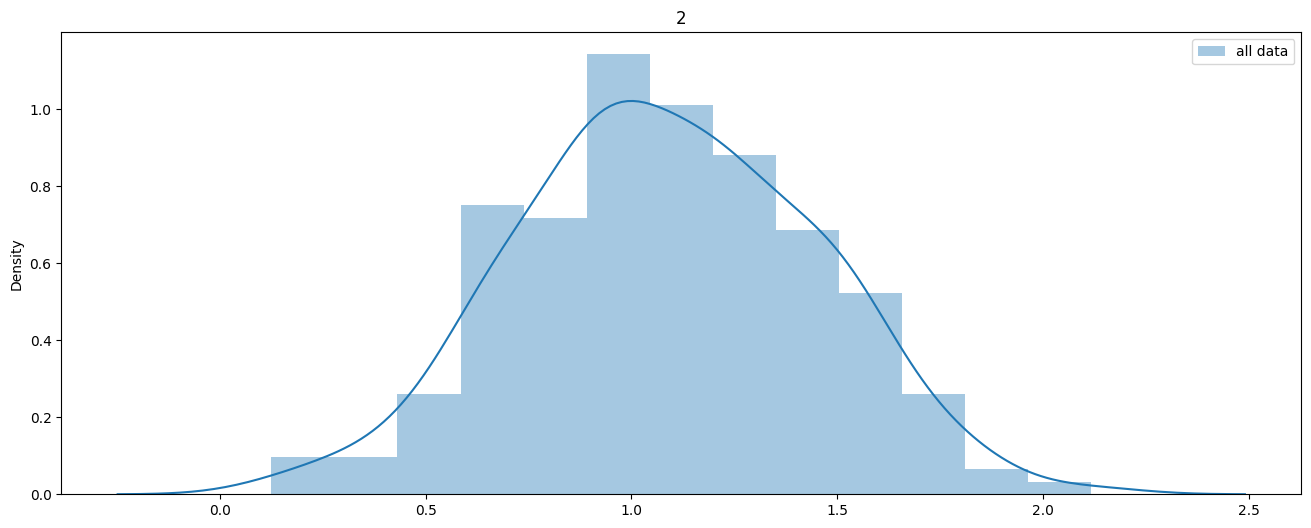

In [85]:
# Distribution plot

bins = None
for col in features:
    plt.figure(figsize=(16, 6))
    sns.distplot(df[col].values,bins=bins,label='all data') #without gaps  
    # sns.distplot(valve1_data['1.csv'].values,bins=bins,label='valve1 1.csv') #without gaps  
    # sns.distplot(valve2_data['1.csv'].values,bins=bins,label='valve2 1.csv') #without gaps  
    # sns.distplot(other_data['1.csv'].values,bins=bins,label='other 1.csv') #without gaps  
    plt.title(col)
    plt.legend()
    plt.show()
# all_data = pd.concat(([anomaly_free_data] + list(valve1_data.values()) + list(valve2_data.values()) + list(other_data.values())),
#                      0).sort_index().drop_duplicates()

In [102]:
# Тест Дики — Фуллера 
# Используется в прикладной статистике и эконометрике для анализа временных рядов для проверки на стационарность
adf_result = adfuller(df[0])

# Parse test statistic and p value
print(f'ADF Test Statistic {adf_result[0]:.2f}')
print(f'P Value {adf_result[1]:.2f}')
if adf_result[1] > 0.05:
    print('Time series is not stationary. Time-dependent structure such as seasonality exists.')
else:
    print('Time series is stationary, p value < 0.05.')

ADF Test Statistic -18.33
P Value 0.00
Time series is stationary, p value < 0.05.


In [106]:
# Декомпозиция временного ряда (тренд, сезонность, остатки)
decomposition = seasonal_decompose(df[1], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

KeyError: 'IPG2211A2N'

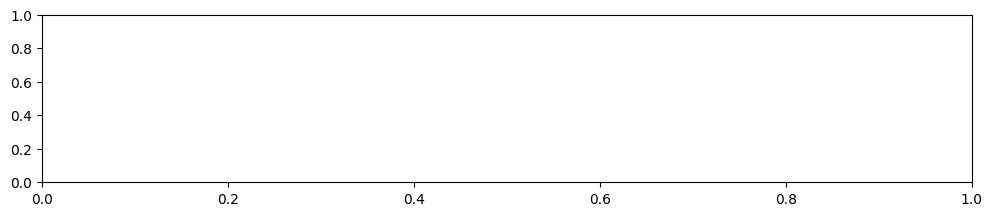

In [104]:
# Графики декомпозиции
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(df['IPG2211A2N'], label='Исходный ряд')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Тренд')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Сезонность')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Остатки')
plt.legend()
plt.tight_layout()

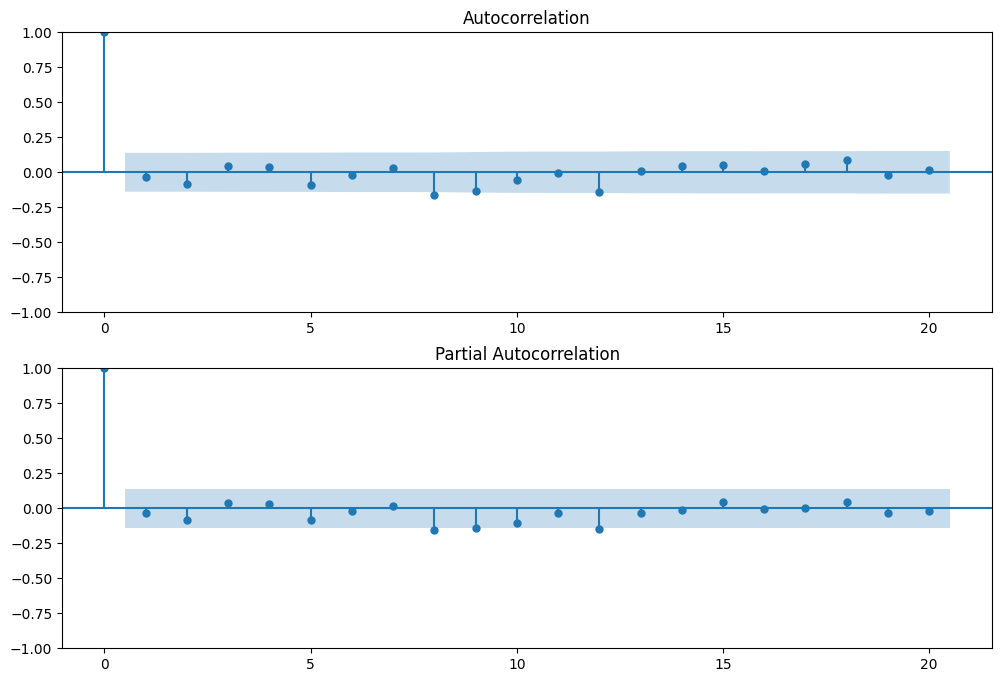

In [126]:
# Автокорреляционная функция (ACF) и частичная автокорреляционная функция (PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df[0], lags=20, ax=ax1)
plot_pacf(df[0], lags=20, ax=ax2)
plt.show()


In [130]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 
                                             'p-value', 
                                             '#Lags Used', 
                                             'Number of Observations Used'])
    
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [131]:
test_stationarity(df[0])

Results of Dickey-Fuller Test:
Test Statistic                -1.438645e+01
p-value                        8.973082e-27
#Lags Used                     0.000000e+00
Number of Observations Used    1.990000e+02
Critical Value (1%)           -3.463645e+00
Critical Value (5%)           -2.876176e+00
Critical Value (10%)          -2.574572e+00
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                -6.640573e+00
p-value                        5.423047e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.980000e+02
Critical Value (1%)           -3.463815e+00
Critical Value (5%)           -2.876251e+00
Critical Value (10%)          -2.574611e+00
dtype: float64


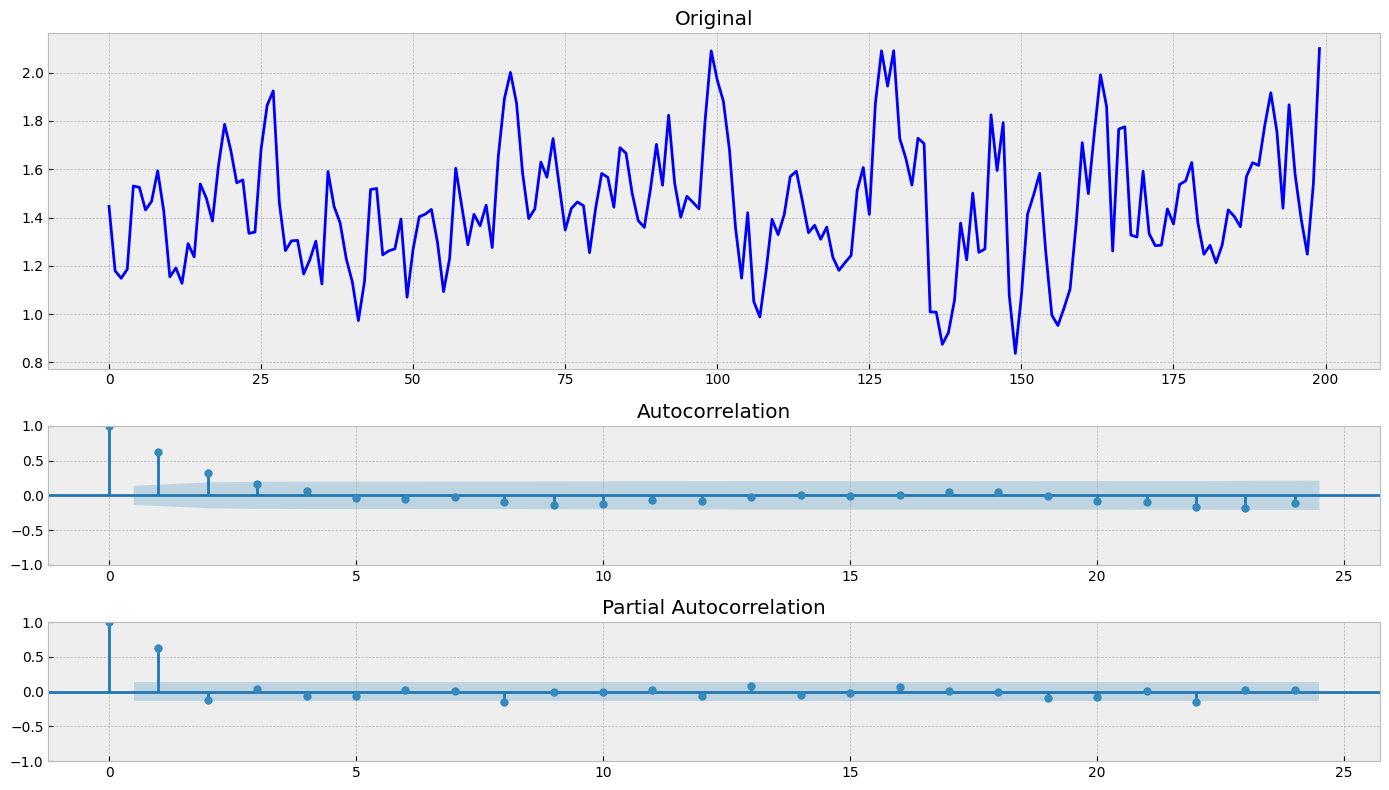

In [134]:
tsplot(df[2])

In [172]:
res = pd.DataFrame()
for i in range(15):
    temp = data[i]
    temp = pd.DataFrame(temp)
    res[i] = temp[0]

In [178]:
for i in range(15):
    px.line(res[i])

In [186]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left")

fig.add_trace(px.line(x=res[0]),
              row=1, col=1)

fig.add_trace(px.line(x=res[1]),
              row=1, col=2)

fig.add_trace(px.line(x=res[2]),
              row=2, col=1)

fig.add_trace(px.line(x=res[3]),
              row=2, col=2)

fig.show()

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'h',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 1.14232967, -0.48404038,  0.66575019,  0.58320887,  2.08442578,
                           0.40156107,  0.16832701, -0.45414267,  0.47847043,  0.43812222,
                          -0.1697961 ,  0.44012284, -0.35095048,  0.53796555,  0.35984426,
                           1.21439562, -0.27180404, -0.41884704,  0.83883772,  1.48549353,
                           0.4482016 ,  0.08708347,  0.4250314 , -0.75892315, -0.30281445,
                           1.11472027,  0.52335205,  1.0856924 , -0.43969919, -0.26112281,
                           1.18702139,  0.44650619, -0.32617525, -0.12005486,  0.22150422,
                          -0.59216718,  2.12037503, -0.64312179,  0.01388265,  0.33111931,
                           0.6554448 ,  0.43887095,  1.24875431,  1.56165907,  0.02234871,
                          -0.52580944,  0.45593988,  0.82692598,  0.18460684, -0.98324387,
                           1.61590916,  0.02580151, -0.21456025, -0.14502456,  0.05194856,
                          -0.70005033,  0.58740323,  1.14293883, -0.42227953, -0.54044224,
                           0.60808001,  0.29092256,  0.85940869, -0.67366091,  1.32611643,
                           1.33108326,  0.84198686,  0.2117298 , -0.33667917, -0.16749556,
                           0.55301323,  0.81810133, -0.55545674,  0.84921908, -0.64667488,
                           0.1179921 ,  0.36728564,  0.43496269, -0.45860278, -0.66210744,
                           0.79891224,  1.22857806,  0.27091611, -0.6859127 ,  1.75864285,
                           0.00974508, -0.41166468,  0.07683332, -0.41429438,  1.57182813,
                           1.13267884, -0.07187224,  1.37805688, -1.11022723, -0.63421709,
                           0.73973697,  0.56141967, -0.02757124,  0.63509704,  1.60568385,
                          -1.07662781,  0.64320176, -0.52887612, -0.8045469 , -1.76572893,
                           1.31333114, -0.87487911,  0.14189299,  0.29957136,  0.39497211,
                          -0.2935633 ,  0.59131151,  0.89464832,  0.23722394,  0.45386561,
                           0.04924497,  0.61901719, -0.45722591,  0.88230893,  0.26459139,
                           0.37026136, -0.01938069,  0.43166936,  2.05293728,  1.96490601,
                           0.76831176,  2.91107778,  0.7293901 , -0.88630422,  0.53124243,
                          -1.73729899,  0.02405682,  0.15793953,  0.32155313, -0.88984498,
                          -2.31416929,  1.09770066,  0.06645374,  0.96463428,  1.14783752,
                           0.88255245,  0.17964587,  1.9295444 , -0.06577926,  1.24594747,
                           1.99171687, -0.4746158 ,  0.82235023, -2.09230818, -0.65212255,
                           0.83646354,  1.16856321,  0.05594217, -0.45029282, -0.4777183 ,
                          -0.29816628,  0.91074682,  0.91233468,  0.12619393,  1.16369861,
                           1.76619263, -0.19664699,  1.77565199,  0.97206303, -0.02607523,
                          -0.98941198,  2.24557596,  0.71895654, -1.2318885 ,  1.17319031,
                           1.59156831, -0.43321738, -0.12189393,  0.34734418,  0.61780624,
                          -0.40394756,  0.83038916,  0.59172662,  0.16908091, -0.29468791,
                           0.20249699,  0.85482031,  0.13632419,  0.55949251,  1.0980549 ,
                          -0.15502897,  1.35752052,  1.75940748,  0.02760513, -0.1810361 ,
                           0.64337957,  0.15700015, -0.74946453, -0.78289076,  2.02560671,
                          -1.17065411, -0.04291855, -0.75664941,  1.66556441,  2.24337735]),
              'xaxis': 'x',
              'y': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
                           14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
                           28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
                           42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
                           56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
                           70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
                           84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
                           98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
                          112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                          126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
                          140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
                          154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
                          168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
                          182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
                          196, 197, 198, 199], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [184]:
px.line(res[0])

In [181]:
import plotly.graph_objects as go

In [179]:
px.line(res)

C:\Users\wilte\AppData\Local\Temp\ipykernel_7024\1934862581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = res[i],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Blues_r')


AttributeError: 'numpy.float64' object has no attribute 'split'

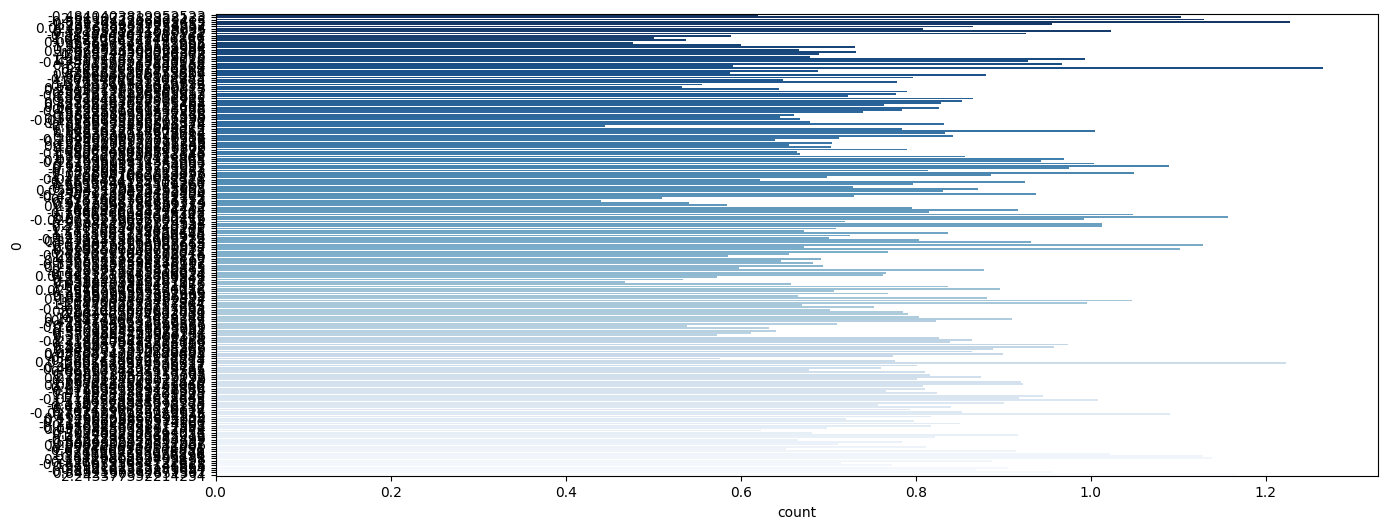

In [174]:
for i in range(15):
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = res[i],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Blues_r')
  fig.text(0.1, 0.95, f'{df[i][0].split("(")[0]}', fontsize=16, fontweight='bold', fontfamily='serif')
  plt.xlabel(' ', fontsize=20)
  plt.ylabel('')
  plt.yticks(fontsize=13)
  plt.box(False)

0


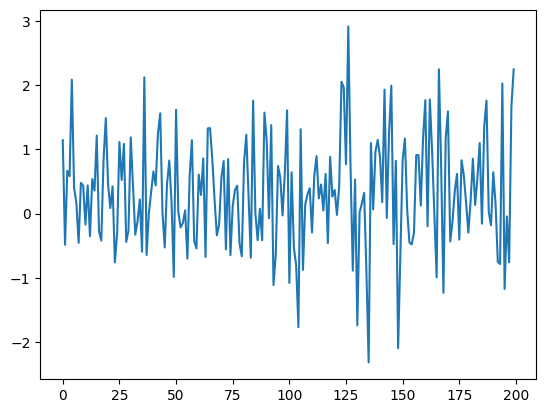

1


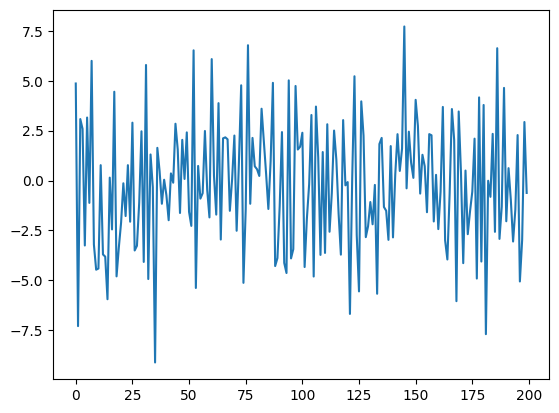

2


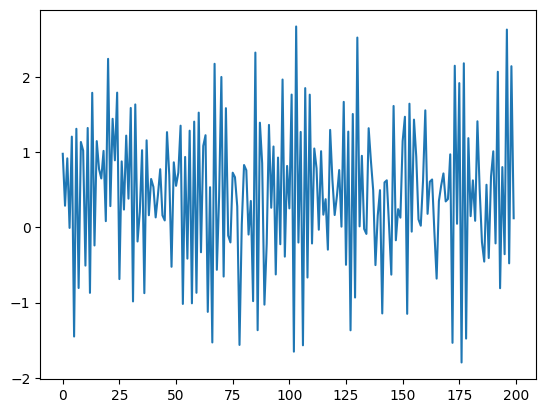

3


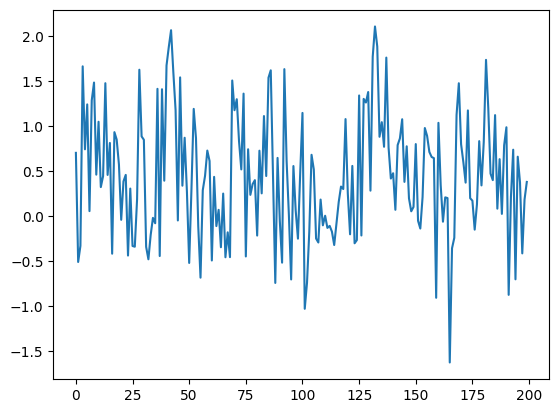

4


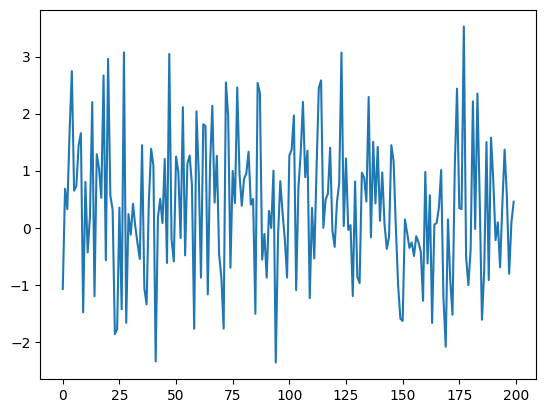

5


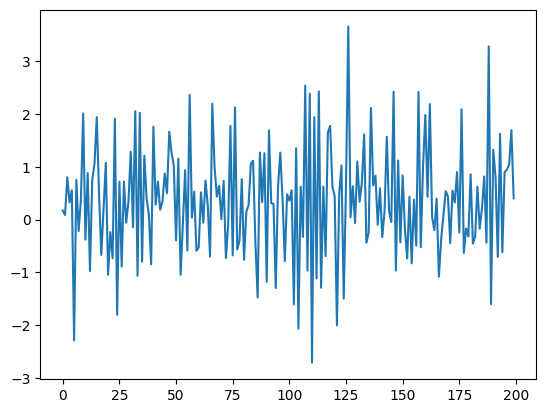

6


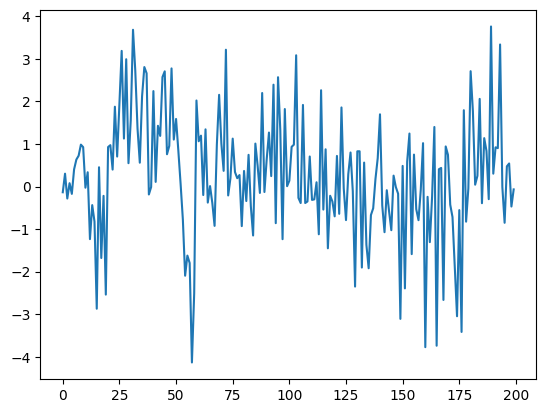

7


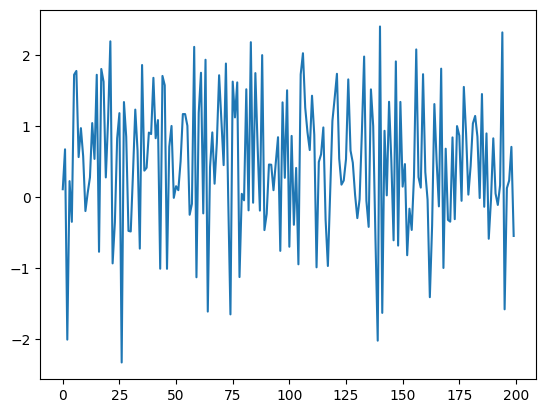

8


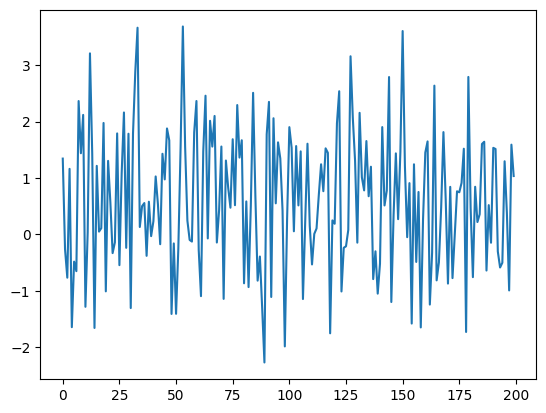

9


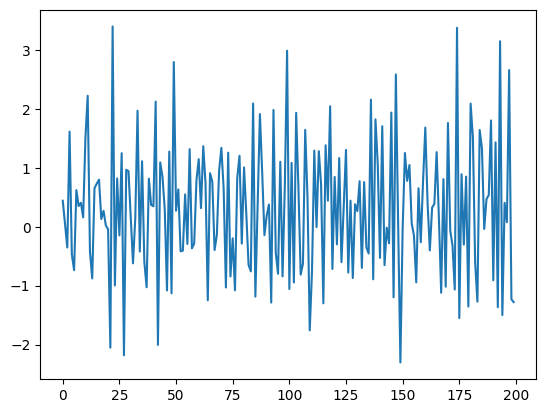

10


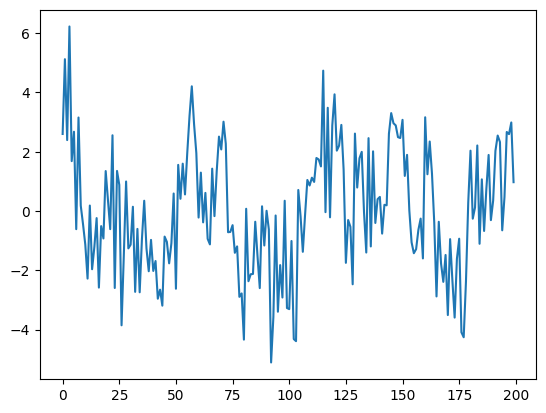

11


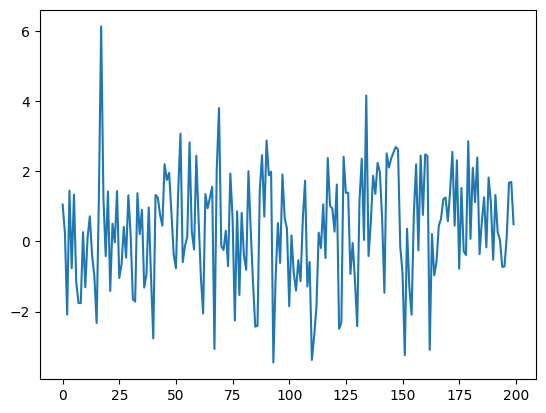

12


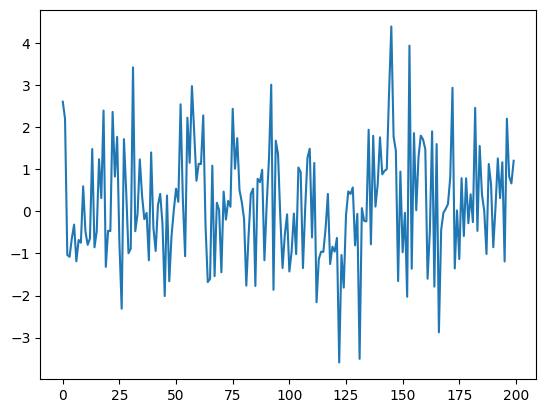

13


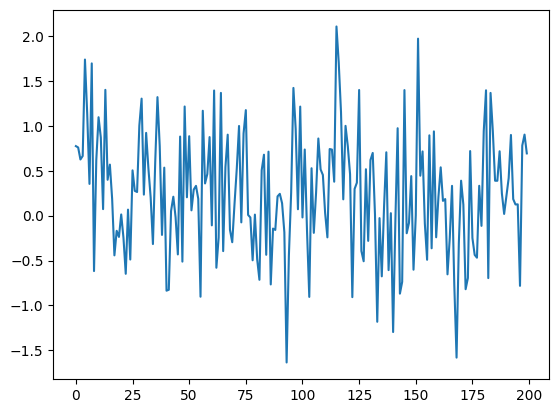

14


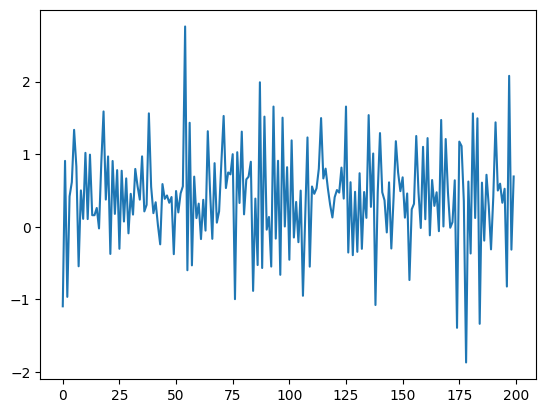

In [188]:
for i in range(15):
    print(i)
    res[i].plot()
    plt.show()

In [171]:
res

""


In [161]:
a[0]

0      1.142330
1     -0.484040
2      0.665750
3      0.583209
4      2.084426
         ...   
195   -1.170654
196   -0.042919
197   -0.756649
198    1.665564
199    2.243377
Name: 0, Length: 200, dtype: float64

In [163]:
b = data[1]
b = pd.DataFrame(b)

In [164]:
b[0]

0      4.859037
1     -7.290394
2      3.077796
3      2.585303
4     -3.253199
         ...   
195    2.277263
196   -5.055258
197   -2.976247
198    2.930485
199   -0.620153
Name: 0, Length: 200, dtype: float64

In [153]:
res = pd.DataFrame(res)

<Axes: >

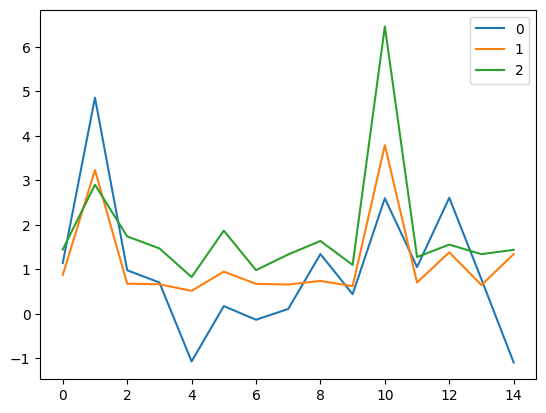

In [154]:
res.plot()

In [19]:
class SSA(object):
    
    __supported_types = (pd.Series, np.ndarray, list)
    
    def __init__(self, tseries, L, save_mem=True):
        """
        Decomposes the given time series with a singular-spectrum analysis. Assumes the values of the time series are
        recorded at equal intervals.
        
        Parameters
        ----------
        tseries : The original time series, in the form of a Pandas Series, NumPy array or list. 
        L : The window length. Must be an integer 2 <= L <= N/2, where N is the length of the time series.
        save_mem : Conserve memory by not retaining the elementary matrices. Recommended for long time series with
            thousands of values. Defaults to True.
        
        Note: Even if an NumPy array or list is used for the initial time series, all time series returned will be
        in the form of a Pandas Series or DataFrame object.
        """
        
        # Tedious type-checking for the initial time series
        if not isinstance(tseries, self.__supported_types):
            raise TypeError("Unsupported time series object. Try Pandas Series, NumPy array or list.")
        
        # Checks to save us from ourselves
        self.N = len(tseries)
        if not 2 <= L <= self.N/2:
            raise ValueError("The window length must be in the interval [2, N/2].")
        
        self.L = L
        self.orig_TS = pd.Series(tseries)
        self.K = self.N - self.L + 1
        
        # Embed the time series in a trajectory matrix
        self.X = np.array([self.orig_TS.values[i:L+i] for i in range(0, self.K)]).T
        
        # Decompose the trajectory matrix
        self.U, self.Sigma, VT = np.linalg.svd(self.X)
        self.d = np.linalg.matrix_rank(self.X)
        
        self.TS_comps = np.zeros((self.N, self.d))
        
        if not save_mem:
            # Construct and save all the elementary matrices
            self.X_elem = np.array([ self.Sigma[i]*np.outer(self.U[:,i], VT[i,:]) for i in range(self.d) ])

            # Diagonally average the elementary matrices, store them as columns in array.           
            for i in range(self.d):
                X_rev = self.X_elem[i, ::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.V = VT.T
        else:
            # Reconstruct the elementary matrices without storing them
            for i in range(self.d):
                X_elem = self.Sigma[i]*np.outer(self.U[:,i], VT[i,:])
                X_rev = X_elem[::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.X_elem = "Re-run with save_mem=False to retain the elementary matrices."
            
            # The V array may also be very large under these circumstances, so we won't keep it.
            self.V = "Re-run with save_mem=False to retain the V matrix."
        
        # Calculate the w-correlation matrix.
        self.calc_wcorr()
            
    def components_to_df(self, n=0):
        """
        Returns all the time series components in a single Pandas DataFrame object.
        """
        if n > 0:
            n = min(n, self.d)
        else:
            n = self.d
        
        # Create list of columns - call them F0, F1, F2, ...
        cols = ["F{}".format(i) for i in range(n)]
        return pd.DataFrame(self.TS_comps[:, :n], columns=cols, index=self.orig_TS.index)
            
    
    def reconstruct(self, indices):
        """
        Reconstructs the time series from its elementary components, using the given indices. Returns a Pandas Series
        object with the reconstructed time series.
        
        Parameters
        ----------
        indices: An integer, list of integers or slice(n,m) object, representing the elementary components to sum.
        """
        if isinstance(indices, int): indices = [indices]
        
        ts_vals = self.TS_comps[:,indices].sum(axis=1)
        return pd.Series(ts_vals, index=self.orig_TS.index)
    
    def calc_wcorr(self):
        """
        Calculates the w-correlation matrix for the time series.
        """
             
        # Calculate the weights
        w = np.array(list(np.arange(self.L)+1) + [self.L]*(self.K-self.L-1) + list(np.arange(self.L)+1)[::-1])
        
        def w_inner(F_i, F_j):
            return w.dot(F_i*F_j)
        
        # Calculated weighted norms, ||F_i||_w, then invert.
        F_wnorms = np.array([w_inner(self.TS_comps[:,i], self.TS_comps[:,i]) for i in range(self.d)])
        F_wnorms = F_wnorms**-0.5
        
        # Calculate Wcorr.
        self.Wcorr = np.identity(self.d)
        for i in range(self.d):
            for j in range(i+1,self.d):
                self.Wcorr[i,j] = abs(w_inner(self.TS_comps[:,i], self.TS_comps[:,j]) * F_wnorms[i] * F_wnorms[j])
                self.Wcorr[j,i] = self.Wcorr[i,j]
    
    def plot_wcorr(self, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.d
        
        if self.Wcorr is None:
            self.calc_wcorr()
        
        ax = plt.imshow(self.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)
        
        # For plotting purposes:
        if max == self.d:
            max_rnge = self.d-1
        else:
            max_rnge = max
        
        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)

<Axes: >

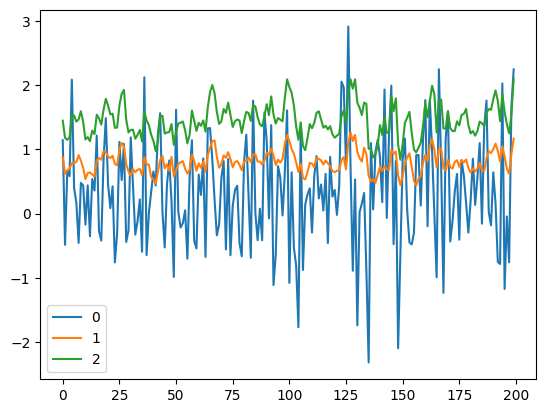

In [128]:
df.plot()

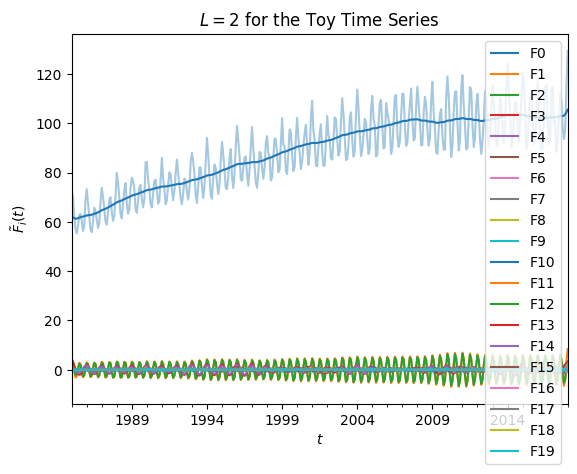

In [26]:
F_ssa_L2 = SSA(df['IPG2211A2N'], 20)
F_ssa_L2.components_to_df().plot()
F_ssa_L2.orig_TS.plot(alpha=0.4)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title(r"$L=2$ for the Toy Time Series");

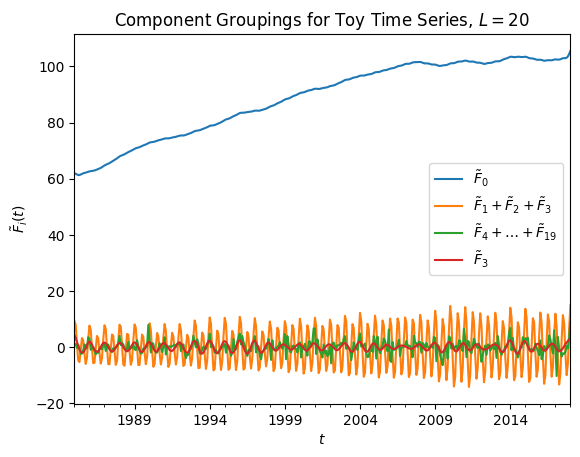

In [28]:
F_ssa_L2.reconstruct(0).plot()
F_ssa_L2.reconstruct([1,2,3]).plot()
F_ssa_L2.reconstruct(slice(4,20)).plot()
F_ssa_L2.reconstruct(3).plot()
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title("Component Groupings for Toy Time Series, $L=20$");
plt.legend([r"$\tilde{F}_0$", 
            r"$\tilde{F}_1+\tilde{F}_2+\tilde{F}_3$", 
            r"$\tilde{F}_4+ \ldots + \tilde{F}_{19}$",
            r"$\tilde{F}_3$"]);